In [1]:
from bs4 import BeautifulSoup,SoupStrainer
import requests
import pandas as pd
import re
import math
from pprint import pprint
from datetime import datetime

import selenium
from selenium.webdriver.support.wait import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoAlertPresentException
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from selenium.webdriver.chrome.options import Options


## Retrieve initial search to see how many returned

In [2]:
#Enter URL of the search on buyacar
buyacar_search=input('Enter the URL of the buyacar search, including all parameters')
#'https://www.buyacar.co.uk/cars?f[0]=body:4x4%2Fcrossover&f[1]=body:estate&f[2]=body:mpv&f[3]=colour:Black&f[4]=colour:Blue&f[5]=colour:Green&f[6]=colour:Grey&f[7]=colour:Red&f[8]=colour:Silver&f[9]=colour:Unknown&f[10]=colour:Unspecified&f[11]=colour:White&f[12]=doors:5&f[13]=gearbox:manual&f[14]=mileage:%5B*%20TO%2030000%5D&f[15]=mpg:b&f[16]=price:%5B10000%20TO%2015000%5D&f[17]=seats:5&f[18]=vehicle_type:car&f[19]=year:%5B2014%20TO%202019%5D'
#'https://www.buyacar.co.uk/cars?f[0]=co2:a&f[1]=co2:b&f[2]=co2:c&f[3]=colour:Black&f[4]=colour:Blue&f[5]=colour:Green&f[6]=colour:Grey&f[7]=colour:Multi%20Colour&f[8]=colour:Orange&f[9]=colour:Purple&f[10]=colour:Red&f[11]=colour:Silver&f[12]=colour:Unspecified&f[13]=colour:White&f[14]=doors:5&f[15]=fuel:Petrol&f[16]=gearbox:manual&f[17]=insurance:a&f[18]=insurance:b&f[19]=price:%5B8000%20TO%2015000%5D&f[20]=seats:5&f[21]=vehicle_type:car&f[22]=year:%5B2014%20TO%202019%5D'
try:
    results_per_page=int(input('And how many results should be loaded per page (max 100)?'))
except:
    results_per_page=100 # If it fails, overwrite with 100 as default
    
# Set up the Selenium driver    
chrome_options = Options()
chrome_options.add_argument("--user-data-dir=C:/Users/Steve/AppData/Local/Google/Chrome/User Data/Default") 
driver = webdriver.Chrome(chrome_options=chrome_options) #Establish a Selenium driver

#Go to the search results. We have to load it using selenium. Using requests does not seem to work, presumably because the content is dynamic
driver.get(buyacar_search)

# Establish how many results there are to search
content = driver.find_element_by_class_name('results_total') #Find the results tag
content.get_attribute('innerHTML') # Retrieve HTML from tag
results_soup = BeautifulSoup(content.get_attribute('innerHTML'), 'html.parser').find("div")
num_results=int(re.search('(\d{0,6}) Results',results_soup.get_text().replace(',','')).group(1))

# Calculate how many results pages needed to loop through given num results specified per page
num_pages=math.ceil(num_results/results_per_page) 
driver.quit()

print(num_pages)

Enter the URL of the buyacar search, including all parametershttps://www.buyacar.co.uk/cars?f[0]=co2:a&f[1]=co2:b&f[2]=co2:c&f[3]=colour:Black&f[4]=colour:Blue&f[5]=colour:Green&f[6]=colour:Grey&f[7]=colour:Multi%20Colour&f[8]=colour:Orange&f[9]=colour:Purple&f[10]=colour:Red&f[11]=colour:Silver&f[12]=colour:Unspecified&f[13]=colour:White&f[14]=doors:5&f[15]=fuel:Petrol&f[16]=gearbox:manual&f[17]=insurance:a&f[18]=insurance:b&f[19]=price:%5B8000%20TO%2015000%5D&f[20]=seats:5&f[21]=vehicle_type:car&f[22]=year:%5B2014%20TO%202019%5D
And how many results should be loaded per page (max 100)?100


C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


128


## Loop through each search results page, and each result within that page. Grab the information from the specific listing underneath each search result. 

In [21]:
# Create a function to return the 

import time

def wait_for_class_to_be_available(total_wait=100):
    try:
        # Give only one class name, if you want to check multiple classes then 'and' will be use in XPATH
        # e.g //*[contains(@class, "class_name") and contains(@class, "second_class_name")]
        elem = driver.find_elements_by_class_name('search_result')
    except:
        total_wait -= 1
        time.sleep(1)
        if total_wait > 1: wait_for_class_to_be_available(total_wait)
        else:
            elem=None
    return elem

In [ ]:
time_count=0
while search_result==None and time_count<60:
    search_results = driver.find_elements_by_class_name('search_result')
    if search_results==None:
        time.sleep(1)
        time_count+=1
        

In [33]:
#for i in range(0,num_pages):
my_list_of_cars=[]

for p_num in range(0,num_pages):
#for p_num in range(0,1):
    
    search_url=buyacar_search+'&offset={}&limit={}'.format(p_num,results_per_page) #establish the URL of the specific page
    driver = webdriver.Chrome(chrome_options=chrome_options) #Establish a Selenium driver
    
    #Go to the search results
    driver.get(search_url)

    #search_results = driver.find_elements_by_class_name('search_result') #List all search results on page (length of list should )
    #search_results=wait_for_class_to_be_available()
    
    # Load the search results in a selenium browser. If it doesn't manage to find the path, wait until it loads
    time_count=0
    search_results=[]
    while len(search_results)==0 and time_count<40:
        search_results = driver.find_elements_by_class_name('search_result')
        if len(search_results)==0:
            time.sleep(1)
            time_count+=1
            print("Waiting...")
    if search_results==None:
        print("No search results returned for page {} @ {}".format(p_num,datetime.now()))
    elif len(search_results)==0:
        print("No search results returned for page {} @ {}".format(p_num,datetime.now()))
    else:
        print("Retrieved {} search results from page {} @ {}".format(len(search_results),p_num,datetime.now()))
    
           
    
    # Loop through each individual search result
    #for search_result in search_results[:1]:
    for n,search_result in enumerate(search_results):
        
        #if n%20==0:
        #    print("Onto result number:{} @ {}".format(n,datetime.now()))
        
        my_dict={}
        results_html=BeautifulSoup(search_result.get_attribute('innerHTML'), 'html.parser')
        
        my_dict['page']=p_num
        my_dict['search result num']=n
        
        #Get URL
        try:
            my_dict['link_to_car']='https://www.buyacar.co.uk/{}'.format(results_html.find("a").get("href"))
        except:
            pass
        
        #Get the car's detailed name
        try:
            my_dict['car name detail']=results_html.find("h2",{"class":"search_result_car_name"}).find("a").get_text()
        except:
            pass
        
        if 'estate' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='Estate'
        elif 'suv' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='SUV'
        elif 'hatchback' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='Hatchback'
        elif 'mpv' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='MPV'
        elif 'saloon' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='Saloon'
        elif 'coupe' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='Coupe'
        elif 'convertible' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='Convertible'
        elif 'roadster' in my_dict['car name detail'].lower():
            my_dict['Body Type (Derived)']='Convertible'
        else:
            my_dict['Body Type (Derived)']='NOT CLASSIFIED'

        #Get the car's simple name
        try:
            my_dict['car name']=' '.join([x["content"] for x in results_html.find_all("meta")])
        except:
            pass
        
        
        try:
            my_dict['price']=results_html.find("div",{"class":"search_result_price"}).find("span",{"class":"one_off_price"}).get_text()
        except:
            pass
        try:
            my_dict['transmission']=results_html.find("ul",{"class":"search_result_info_icons"}).find("li",{"class":"gear_info"}).get_text()
        except:
            pass
        
        try:
            my_dict['colour']=results_html.find("ul",{"class":"search_result_info_icons"}).find("li",{"class":"color_info"}).get_text()
        except:
            pass
        try:
            my_dict['year']=results_html.find("ul",{"class":"search_result_info_icons"}).find("li",{"class":"date_info"}).get_text()
        except:
            pass
        
        try:
            my_dict['petrol type']=results_html.find("ul",{"class":"search_result_info_icons"}).find("li",{"class":"fuel_info"}).get_text()
        except:
            pass
        
        try:
            my_dict['mileage']=results_html.find("ul",{"class":"search_result_info_icons"}).find("li",{"class":"miles_info"}).get_text()
        except:
            pass
        
        ######### Go to the specific listing page for that car
        specific_car_soup=None
        try:
            req = requests.get(my_dict['link_to_car'])
            specific_car_soup = BeautifulSoup(req.content, 'html.parser')
        except:
            pass
        
        if specific_car_soup:
            #Check if it has isofix properties
            try:
                int_attrs=[list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.interior-features li")]
                my_dict['isofix']=max([1 if 'isofix' in x else 0 for x in int_attrs])
            except:
                pass

            # Get performance info
            for i in specific_car_soup.select("ul.performance li"):
                try:
                    attr=list(i.findAll("span"))
                    my_dict[attr[0].get_text()]=attr[1].get_text()
                except:
                    pass

            # Get Weight and capabilities info
            for i in specific_car_soup.select("ul.weight-and-capacities li"):
                try:
                    attr=list(i.findAll("span"))
                    my_dict[attr[0].get_text()]=attr[1].get_text()
                except:
                    pass

            # Get General info
            for i in specific_car_soup.select("ul.general li"):
                try:
                    attr=list(i.findAll("span"))
                    my_dict[attr[0].get_text()]=attr[1].get_text()
                except:
                    pass

            #Get Vehicle dimensions inc. capacity of boot
            for i in specific_car_soup.select("ul.vehicle-dimensions li"):
                try:
                    attr=list(i.findAll("span"))
                    my_dict[attr[0].get_text()]=attr[1].get_text()
                except:
                    pass

            #Get Engine and Drive Train info (who knows, maybe it'll be useful)
            for i in specific_car_soup.select("ul.engine-and-drive-train li"):
                try:
                    attr=list(i.findAll("span"))
                    my_dict[attr[0].get_text()]=attr[1].get_text()
                except:
                    pass

            #Get Tyres info (who knows, maybe it'll be useful)
            for i in specific_car_soup.select("ul.tyres li"):
                try:
                    attr=list(i.findAll("span"))
                    my_dict[attr[0].get_text()]=attr[1].get_text()
                except:
                    pass


            #List Standard Equipment: Security
            try:
                my_dict['Security Features']=safety_attrs=', '.join([list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.security li")])
            except:
                pass

            #List Standard Equipment: Driver Convenience
            try:
                my_dict['Entertainment Features']=safety_attrs=', '.join([list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.entertainment li")])
            except:
                pass


            #List Standard Equipment: Safety
            try:
                my_dict['Safety features']=safety_attrs=', '.join([list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.safety li")])
            except:
                pass

            #List Standard Equipment: Exterior
            try:
                my_dict['Exterior features']=safety_attrs=', '.join([list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.exterior-features li")])
            except:
                pass

            #List Standard Equipment: Interior
            try:
                my_dict['Interior features']=safety_attrs=', '.join([list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.interior-features li")])
            except:
                pass

            #List Standard Equipment: Driver Convenience
            try:
                my_dict['Driver Convenience']=safety_attrs=', '.join([list(i.findAll("span"))[0].get_text().lower() for i in specific_car_soup.select("ul.driver-convenience li")])
            except:
                pass

        my_list_of_cars.append(my_dict)
    
    cars_should_have=(p_num+1)*results_per_page
    cars_do_have=len(my_list_of_cars)
    cars_delta=cars_should_have-cars_do_have
    
    print("There are now {} cars in the list. We should have {}, so are missing {}.".format(cars_do_have,cars_should_have,cars_delta))
    driver.quit()


C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Waiting...
Retrieved 100 search results from page 100 @ 2020-05-04 22:09:50.317344


StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=81.0.4044.129)
  (Driver info: chromedriver=2.40.565498 (ea082db3280dd6843ebfb08a625e3eb905c4f5ab),platform=Windows NT 10.0.18362 x86_64)


In [191]:
pd.options.display.max_rows=9999
pd.options.display.max_columns=40

In [29]:
pd.options.display.max_rows=9999
cars_df=pd.DataFrame(my_list_of_cars)
#writer = pd.ExcelWriter(r'C:\Users\steve\Desktop\Buyacar Cars.xlsx', engine='xlsxwriter')
#cars_df.to_excel(writer, index=False)
#worksheet = writer.sheets['Sheet1']


In [30]:
len(my_list_of_cars)

10000

In [36]:
cars_df.head(10)

,0 to 60 mph (secs),0 to 62 mph (secs),AdBlue,Alloys?,Alternative Fuel Qualifying,Badge Engine CC,Badge Power,Based On ID,Body Type (Derived),CC,...,colour,isofix,link_to_car,mileage,page,petrol type,price,search result num,transmission,year
0,NaN,8.6,NaN,Yes,No,1.5,182,NaN,Hatchback,1498,...,Red,1.0,https://www.buyacar.co.uk//ford/focus/focus-ha...,"26,749 miles",0,Petrol,"£11,400",0,manual,2016 (16)
1,NaN,11,NaN,Yes,No,1.0,125,NaN,Hatchback,998,...,Blue,1.0,https://www.buyacar.co.uk//ford/focus/focus-ha...,"34,249 miles",0,Petrol,"£9,995",1,manual,2016 (16)
2,NaN,11,NaN,Yes,No,1.0,125,NaN,Hatchback,999,...,Red,1.0,https://www.buyacar.co.uk//ford/ecosport/ecosp...,"14,000 miles",0,Petrol,"£13,480",2,manual,2018 (18)
3,NaN,11,NaN,Yes,No,1.0,125,NaN,Hatchback,999,...,Blue,1.0,https://www.buyacar.co.uk//ford/ecosport/ecosp...,"8,811 miles",0,Petrol,"£14,700",3,manual,2018 (18)
4,NaN,11.5,NaN,Yes,No,1.0,125,NaN,Estate,998,...,White,1.0,https://www.buyacar.co.uk//ford/focus/focus-es...,"27,508 miles",0,Petrol,"£8,700",4,manual,2015 (15)
5,NaN,11.2,NaN,Yes,No,1.0,100,NaN,Hatchback,998,...,Grey,0.0,https://www.buyacar.co.uk//ford/fiesta/fiesta-...,"7,402 miles",0,Petrol,"£12,495",5,manual,2018 (18)
6,NaN,8.8,NaN,Yes,No,1.5,182,NaN,Estate,1498,...,Blue,1.0,https://www.buyacar.co.uk//ford/focus/focus-es...,"7,000 miles",0,Petrol,"£13,000",6,manual,2017 (67)
7,NaN,13.2,NaN,Yes,No,0.9,90,NaN,Hatchback,898,...,Black,1.0,https://www.buyacar.co.uk//renault/captur/capt...,"29,158 miles",0,Petrol,"£8,000",7,manual,2016 (66)
8,NaN,9.3,NaN,Yes,No,1.2,110,NaN,Hatchback,1199,...,Grey,1.0,https://www.buyacar.co.uk//citroen/c4-cactus/c...,"4,501 miles",0,Petrol,"£12,795",8,manual,2019 (69)
9,NaN,10.8,NaN,Yes,No,1.2,90,NaN,Hatchback,1197,...,Black,1.0,https://www.buyacar.co.uk//volkswagen/polo/pol...,"6,012 miles",0,Petrol,"£9,590",9,manual,2016 (16)


In [31]:
cars_df.groupby('page').count()

,0 to 60 mph (secs),0 to 62 mph (secs),AdBlue,Alloys?,Alternative Fuel Qualifying,Badge Engine CC,Badge Power,Based On ID,Body Type (Derived),CC,...,car name detail,colour,isofix,link_to_car,mileage,petrol type,price,search result num,transmission,year
page,,,,,,,,,,,,,,,,,,,,,
0,11,89,2,100,100,100,100,1,100,100,...,100,100,100,100,100,100,100,100,100,100
1,10,89,4,99,99,99,99,3,100,99,...,100,100,99,100,100,100,100,100,100,100
2,13,84,1,99,99,99,99,2,100,99,...,100,100,99,100,100,100,100,100,100,100
3,12,83,1,97,97,97,97,2,100,97,...,100,100,97,100,100,100,100,100,100,100
4,9,88,1,97,97,97,97,4,100,97,...,100,100,97,100,100,100,100,100,100,100
5,14,84,1,99,99,99,99,3,100,99,...,100,100,99,100,100,100,100,100,100,100
6,7,90,1,98,98,98,98,3,100,98,...,100,100,98,100,100,100,100,100,100,100
7,16,77,2,96,96,96,96,5,100,96,...,100,100,96,100,100,100,100,100,100,100
8,18,76,2,96,96,96,96,4,100,96,...,100,100,96,100,100,100,100,100,100,100


In [13]:
writer = pd.ExcelWriter(r"C:\Users\steve\Dropbox\Cars2.xlsx", engine='xlsxwriter')
cars_df.to_excel(writer)
worksheet = writer.sheets['Sheet1']


In [32]:
cars_df.to_csv(r"C:\Users\steve\Dropbox\Cars2.csv")

### Filter and segment

In [45]:
#Import
cars_df=pd.read_excel(r"C:\Users\steve\Dropbox\Cars (Filtered).xlsx")

Copy the full dataframe

In [46]:
filtered_car_df=cars_df.copy()
filtered_car_df.shape


(10000, 100)

Derive brand name as the first bit of data before a space

In [47]:
# Derive brand name as the first bit of data before a space
filtered_car_df['Brand']=filtered_car_df['car name'].str.split(' ').apply(lambda x: x[0])
filtered_car_df['Make exc. Year']=filtered_car_df['car name'].str.split(' ').apply(lambda x: ' '.join(x[:-1]))
filtered_car_df.shape

(10000, 101)

In [48]:
filtered_car_df['Brand'].unique()

array(['Vauxhall', 'Renault', 'Peugeot', 'Citroen', 'Jeep', 'Ford',
       'Skoda', 'KIA', 'Honda', 'Volkswagen', 'Hyundai', 'Seat', 'Dacia',
       'Nissan', 'Toyota', 'Mazda', 'BMW', 'Audi', 'Mercedes-Benz',
       'Fiat', 'Mini', 'Suzuki', 'Volvo', 'DS', 'Infiniti', 'Alfa', 'MG',
       'Mitsubishi'], dtype=object)

In [49]:
# Create a df holding the brands interested in
selected_brands=['Ford', 'Volkswagen', 'Skoda', 'Honda', 'Vauxhall', 'Mitsubishi', 'Hyundai',\
       'Nissan', 'Suzuki', 'Seat', 'KIA', 'Mazda', 'Audi', 'Volvo', 'Toyota']

select_brands_df=pd.DataFrame(selected_brands,columns=['brand_name'])


Subset to only include preferred brands

In [50]:
filtered_car_df=pd.merge(filtered_car_df, select_brands_df, how='inner', left_on='Brand', right_on='brand_name')
filtered_car_df.shape #Drops about 2k to 8148

(8033, 102)

Subset to only include required columns

In [51]:
filtered_car_df.columns

Index(['Brand', 'car name', 'car name detail', 'Body Type (Derived)', 'colour',
       'isofix', 'link_to_car', 'mileage', 'page', 'petrol type',
       ...
       'Tyre Size Rear', 'Tyre Size Spare', 'Vehicle Homologation Class',
       'Wheel Style', 'Wheel Type', 'Wheelbase', 'Width',
       'Width (including mirrors)', 'Make exc. Year', 'brand_name'],
      dtype='object', length=102)

In [52]:
filtered_car_df=filtered_car_df[['Brand','Make exc. Year','car name','car name detail','Body Type (Derived)','colour','isofix',\
                 'link_to_car','mileage','page','petrol type','price','transmission','Luggage Capacity (Seats Up)','year',\
                                 'Badge Engine CC','Fuel Tank Capacity (Litres)','Gears','Height','Length','Width','NCAP Child Occupant Protection %',\
                                 'Insurance Group 1','Insurance Group 1 - 50 Effective January 07', 'Insurance Group 2',\
                                'Driver Convenience','Entertainment Features','Exterior features','Interior features','Safety features','Security Features']]
filtered_car_df.shape

(8033, 31)

In [53]:
filtered_car_df['Volume']=pd.to_numeric(filtered_car_df['Height'])*\
pd.to_numeric(filtered_car_df['Width'])*\
pd.to_numeric(filtered_car_df['Length'])
filtered_car_df.shape

(8033, 32)

Make numeric fields numeric

In [54]:
filtered_car_df['Price £s']=pd.to_numeric(filtered_car_df['price'].str.replace(r"[\D]",'')) # Remove all non numeric characters
filtered_car_df['Mileage']=pd.to_numeric(filtered_car_df['mileage'].str.replace(r"[\D]",'')) # Remove all non numeric characters
filtered_car_df['Year']=pd.to_numeric(filtered_car_df['year'].str[:4]) # Remove all non numeric characters
filtered_car_df['Year (Plate)']=pd.to_numeric(filtered_car_df['year'].str[-3:-1]) # Remove all non numeric characters
filtered_car_df['Boot Space']=pd.to_numeric(filtered_car_df['Luggage Capacity (Seats Up)'])
filtered_car_df.shape

(8033, 37)

### Apply major filters

In [55]:
filtered_car_df=filtered_car_df[(filtered_car_df['Mileage']<40000) & (filtered_car_df['Boot Space']>=570)]
filtered_car_df.shape

(115, 37)

In [56]:
filtered_car_df=filtered_car_df[filtered_car_df['isofix']==1]
filtered_car_df.shape

(115, 37)

In [57]:
filtered_car_df=filtered_car_df.sort_values(by=['Boot Space','Price £s','Mileage'],ascending=[False,True,True])
filtered_car_df.shape

(115, 37)

In [58]:
len(filtered_car_df['car name'].unique())

26

In [59]:
len(filtered_car_df['Make exc. Year'].unique())

13

In [60]:
filtered_car_df['Make exc. Year'].unique()

array(['Vauxhall Combo Life', 'Ford C-Max', 'Skoda Superb', 'KIA Ceed',
       'Honda Civic', 'Skoda Octavia', 'Volkswagen Golf', 'Hyundai I30',
       'Hyundai IX35', 'Volkswagen Golf SV', 'Honda CR-V', 'Seat Leon',
       'Ford Focus'], dtype=object)

In [61]:
exclude_models=['Vauxhall Combo Life','Ford C-Max','Ford Focus','Seat Leon']
filtered_car_df=filtered_car_df[~filtered_car_df['Make exc. Year'].isin(exclude_models)]# Not in list
filtered_car_df.shape


(93, 37)

In [62]:
the_shortlist=sorted(filtered_car_df[filtered_car_df['Boot Space']>530]['Make exc. Year'].unique())



In [63]:
filtered_car_df=filtered_car_df[filtered_car_df['Make exc. Year'].isin(the_shortlist)]
filtered_car_df.shape


(93, 37)

In [28]:
filtered_car_df=filtered_car_df.drop(columns=['price','mileage','page','year','Luggage Capacity (Seats Up)'])
filtered_car_df.shape

(93, 32)

In [64]:
filtered_car_df.to_excel(r"C:\Users\steve\Dropbox\Cars (shortlist).xlsx")

In [349]:
filtered_car_df.head()

,Brand,Make exc. Year,car name,car name detail,Body Type (Derived),colour,isofix,link_to_car,mileage,page,petrol type,price,transmission,Luggage Capacity (Seats Up),year,Badge Engine CC,Fuel Tank Capacity (Litres),Gears,Height,Length,Width,NCAP Child Occupant Protection %,Driver Convenience,Entertainment Features,Exterior features,Interior features,Safety features,Security Features,Volume,Price £s,Mileage,Year,Year (Plate),Boot Space
2653,Skoda,Skoda Superb,Skoda Superb 2016,SKODA Superb 1.4 TSI 150 SE 5dr Petrol Hatchback,Hatchback,Red,1.0,https://www.buyacar.co.uk//skoda/superb/superb...,"29,674 miles",67,Petrol,"£12,495",manual,625,2016 (16),1.4,66,6 SPEED,1468,4861,1864,86,"adaptive cruise control, dynamic steering resp...",dab digital radio,"aero wiper + intermittent function, body colou...","12v power point in centre console, 12v power p...",3 point height adj front seatbelts + pretensio...,anti theft alarm with interior monitor and til...,1.330141e+10,12495,29674.0,2016,16,625.0
6906,KIA,KIA Ceed,KIA Ceed 2019,KIA CEED 1.0T GDI ISG 2 SPORTSWAGON ESTATE estate,Estate,White,1.0,https://www.buyacar.co.uk//kia/ceed/ceed-sport...,"11,536 miles",10,Petrol,"£12,977",manual,625,2019 (68),1.0,50,6 SPEED,1465,4600,1800,NaN,"3.5"" supervision cluster display, 7"" colour to...","6 speaker audio system, dab radio with mp3, il...",all-round electric windows with front auto up ...,"12v power socket in front console (x2), 3 x pa...",abs with electronic brakeforce distribution (e...,"alarm system, engine immobiliser & deadlocks, ...",1.213020e+10,12977,11536.0,2019,68,625.0
6830,KIA,KIA Ceed,KIA Ceed 2019,KIA CEED 1.0T GDi ISG 2 5dr sportswagon,NOT CLASSIFIED,White,1.0,https://www.buyacar.co.uk//kia/ceed/ceed-sport...,"16,438 miles",0,Petrol,"£13,350",manual,625,2019 (68),1.0,50,6 SPEED,1465,4600,1800,NaN,"3.5"" supervision cluster display, 7"" colour to...","6 speaker audio system, dab radio with mp3, il...",all-round electric windows with front auto up ...,"12v power socket in front console (x2), 3 x pa...",abs with electronic brakeforce distribution (e...,"alarm system, engine immobiliser & deadlocks, ...",1.213020e+10,13350,16438.0,2019,68,625.0
6832,KIA,KIA Ceed,KIA Ceed 2019,KIA CEED 1.0T GDi ISG 2 5dr sportswagon,NOT CLASSIFIED,White,1.0,https://www.buyacar.co.uk//kia/ceed/ceed-sport...,"16,438 miles",1,Petrol,"£13,350",manual,625,2019 (68),1.0,50,6 SPEED,1465,4600,1800,NaN,"3.5"" supervision cluster display, 7"" colour to...","6 speaker audio system, dab radio with mp3, il...",all-round electric windows with front auto up ...,"12v power socket in front console (x2), 3 x pa...",abs with electronic brakeforce distribution (e...,"alarm system, engine immobiliser & deadlocks, ...",1.213020e+10,13350,16438.0,2019,68,625.0
7023,KIA,KIA Ceed,KIA Ceed 2019,KIA CEED 2 ISG sportswagon,NOT CLASSIFIED,Silver,1.0,https://www.buyacar.co.uk//kia/ceed/ceed-sport...,"13,759 miles",46,Petrol,"£13,395",manual,625,2019 (19),1.0,50,6 SPEED,1465,4600,1800,NaN,"3.5"" supervision cluster display, 7"" colour to...","6 speaker audio system, dab radio with mp3, il...",all-round electric windows with front auto up ...,"12v power socket in front console (x2), 3 x pa...",abs with electronic brakeforce distribution (e...,"alarm system, engine immobiliser & deadlocks, ...",1.213020e+10,13395,13759.0,2019,19,625.0


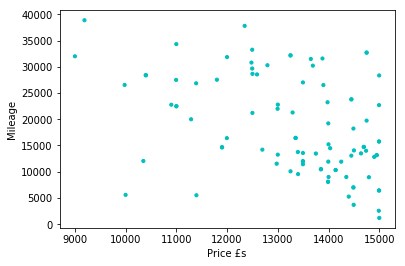

In [30]:
filtered_car_df.plot.scatter(x='Price £s', y='Mileage',s=filtered_car_df['Boot Space']/60,c='c')

,Price £s,Mileage,Boot Space,Year
Make exc. Year,,,,
KIA Ceed,14061.307692,10093.615385,625.000000,2019.000000
Skoda Superb,12495.000000,29674.000000,625.000000,2016.000000
Honda Civic,11149.000000,21532.500000,624.000000,2017.000000
Volkswagen Golf,13146.000000,20414.000000,605.000000,2016.833333
Hyundai I30,12611.333333,15954.000000,602.000000,2018.000000
Skoda Octavia,13059.256410,16909.846154,594.615385,2017.794872
Hyundai IX35,9188.000000,38874.000000,591.000000,2015.000000
Volkswagen Golf SV,14490.000000,18230.000000,590.000000,2018.000000
Honda CR-V,13815.280000,23490.400000,589.000000,2016.120000


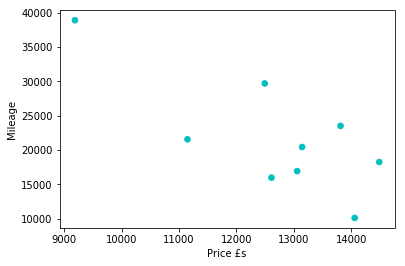

In [38]:
import numpy as np
summary_df=filtered_car_df.groupby(by=['Make exc. Year'])['Price £s','Mileage','Boot Space','Year'].mean()
summary_df.plot.scatter(x='Price £s', y='Mileage',s=filtered_car_df['Boot Space']/20,c='c')
summary_df.sort_values(by=['Price £s','Mileage'])
summary_df.sort_values(by='Boot Space',ascending=False)

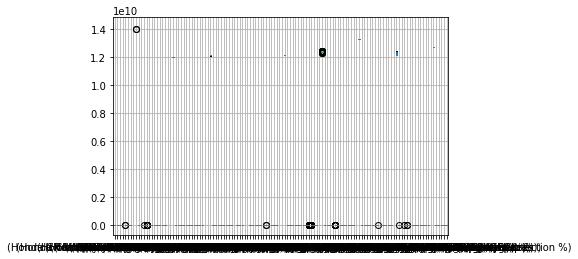

In [44]:
filtered_car_df.groupby(by=['Make exc. Year']).boxplot('Price £s')

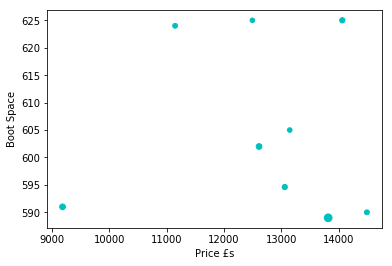

In [33]:
summary_df.plot.scatter(x='Price £s', y='Boot Space',s=filtered_car_df['Mileage']/500,c='c')


In [34]:
filtered_car_df=filtered_car_df[(filtered_car_df['Price £s']<13000)|(filtered_car_df['Boot Space']>525)]
filtered_car_df.shape

(93, 32)

In [35]:
len(filtered_car_df['Make exc. Year'].unique())

9

In [36]:
sorted(filtered_car_df['Make exc. Year'].unique())


['Honda CR-V',
 'Honda Civic',
 'Hyundai I30',
 'Hyundai IX35',
 'KIA Ceed',
 'Skoda Octavia',
 'Skoda Superb',
 'Volkswagen Golf',
 'Volkswagen Golf SV']

In [37]:
sorted(filtered_car_df[filtered_car_df['Boot Space']>550]['Make exc. Year'].unique())

['Honda CR-V',
 'Honda Civic',
 'Hyundai I30',
 'Hyundai IX35',
 'KIA Ceed',
 'Skoda Octavia',
 'Skoda Superb',
 'Volkswagen Golf',
 'Volkswagen Golf SV']

In [347]:
browser=webdriver.Chrome()    
for n,i in enumerate(sorted(filtered_car_df['Make exc. Year'].unique())):
    
     #first tab
    browser.get('https://www.google.co.uk/search?q={}+interior+dimensions'.format(i.replace(' ','+')))

    #second tab
    browser.execute_script("window.open('about:blank', 'tab{}');".format(n+1))
    browser.switch_to.window("tab{}".format(n+1))

In [344]:
driver = webdriver.Chrome(chrome_options=chrome_options) #Establish a Selenium driver
search_url='https://www.google.co.uk/search?q={}+interior+dimensions'.format(i.replace(' ','+'))
    #Go to the search results
driver.get(search_url)

driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + 't')
window_before = driver.window_handles[n]

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [345]:
browser=webdriver.Chrome()

#first tab
browser.get('http:/reddit.com')

#second tab
browser.execute_script("window.open('about:blank', 'tab{}');".format(n+1))
browser.switch_to.window("tab{}".format(n+1))


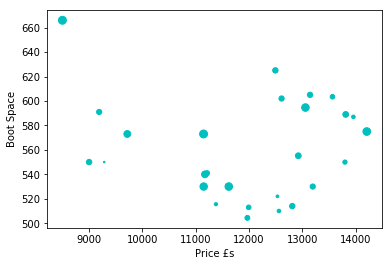

In [308]:
summary_df=filtered_car_df.groupby(by=['Make exc. Year'])['Price £s','Mileage','Boot Space'].mean()
summary_df.plot.scatter(x='Price £s', y='Boot Space',s=filtered_car_df['Mileage']/500,c='c')
